In [1]:
import numpy as np
import tushare as ts
import matplotlib.pyplot as plt
import pandas as pd
import os

In [2]:
from matplotlib import font_manager

fontP = font_manager.FontProperties()
fontP.set_family('SimHei')
fontP.set_size(14)

In [3]:
pro = ts.pro_api(os.environ['TUSHARE_API_TOKEN'])

In [18]:
start = '20200901'                 # 回测起始时间
end = '20200930'                   # 回测结束时间

In [19]:
hs300_data = pro.index_daily(ts_code='000300.SH', start_date=start, end_date=end).sort_index(ascending=False) # 沪深300
zz500_data = pro.index_daily(ts_code='000905.SH', start_date=start, end_date=end).sort_index(ascending=False) # 中证500
cyb_data = pro.index_daily(ts_code='399006.SZ', start_date=start, end_date=end).sort_index(ascending=False) # 创业板

In [20]:
hsi_data = pro.index_global(ts_code='HSI', start_date=start, end_date=end).sort_index(ascending=False) # 恒生
spx_data = pro.index_global(ts_code='SPX', start_date=start, end_date=end).sort_index(ascending=False) # 标普500
ixic_data = pro.index_global(ts_code='IXIC', start_date=start, end_date=end).sort_index(ascending=False) # 纳斯达克

In [21]:
time=np.array(hs300_data['trade_date'])

In [48]:
def draw_index_change(ax, index_data, start_index, time, name, index_month):
    change = (index_data/start_index - 1) * 100
    ax.plot(time, change, label=name)
    for i,j in zip(time,change):
        if i == time[-1]:
            index_month.append(j)
            ax.annotate("{:10.2f}".format(j),xy=(i,j))

In [70]:
index_month = []

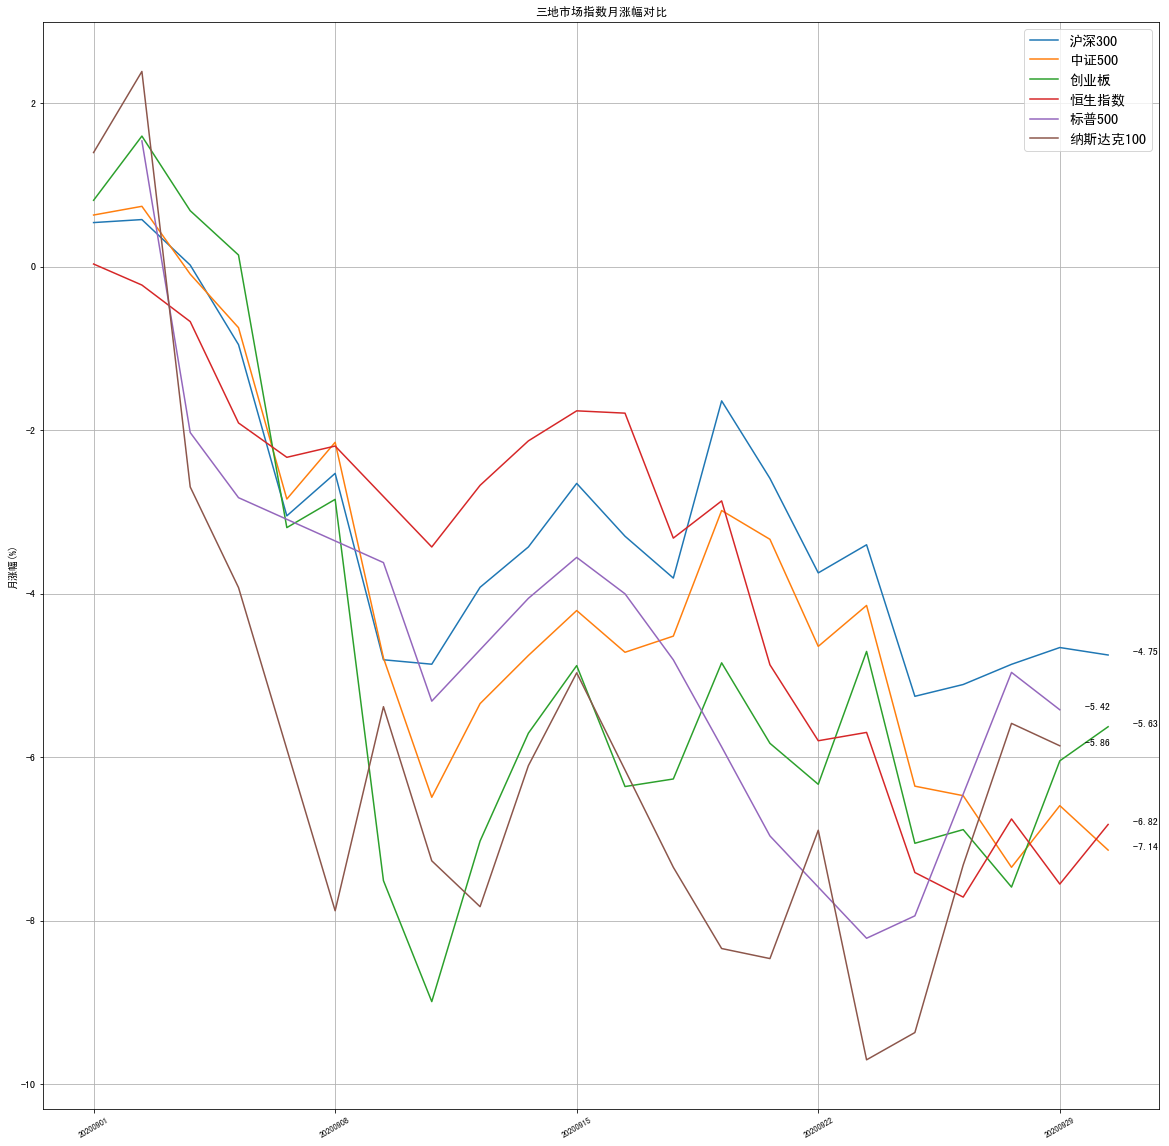

In [71]:
fig,ax=plt.subplots(figsize=(20,20))
draw_index_change(ax, np.array(hs300_data['close']), np.array(hs300_data['pre_close'])[0], np.array(hs300_data['trade_date']), '沪深300', index_month)
draw_index_change(ax, np.array(zz500_data['close']), np.array(zz500_data['pre_close'])[0], np.array(zz500_data['trade_date']), '中证500', index_month)
draw_index_change(ax, np.array(cyb_data['close']), np.array(cyb_data['pre_close'])[0], np.array(cyb_data['trade_date']), '创业板', index_month)
draw_index_change(ax, np.array(hsi_data['close']), np.array(hsi_data['pre_close'])[0], np.array(hsi_data['trade_date']), '恒生指数', index_month)
draw_index_change(ax, np.array(spx_data['close']), np.array(spx_data['pre_close'])[0], np.array(spx_data['trade_date']), '标普500', index_month)
draw_index_change(ax, np.array(ixic_data['close']), np.array(ixic_data['pre_close'])[0], np.array(ixic_data['trade_date']), '纳斯达克100', index_month)
ax.legend(loc='best', prop=fontP)
ax.grid(True)
ax.set_xticks([time[i] for i in range(0,len(time),5)])
ax.set_ylabel('月涨幅(%)', fontname='SimHei')
ax.set_title('三地市场指数月涨幅对比', fontname='SimHei')
plt.xticks(rotation=30,fontsize='small')
plt.show()

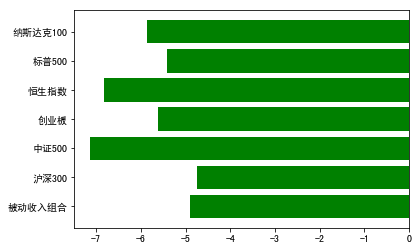

In [72]:
bdsr_month = -4.9
name_list = ['被动收入组合', '沪深300','中证500','创业板','恒生指数', '标普500', '纳斯达克100']
index_month.insert(0, bdsr_month)
colors = ['r' if i >=0 else 'g' for i in index_month]
plt.barh(range(len(index_month)), index_month, color = colors, tick_label=name_list)
plt.show()